# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [238]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [239]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [240]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [241]:
df_train.shape

(15223, 52)

In [242]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [243]:
df_test.shape

(14910, 52)

In [244]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [245]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [246]:
df = df_test.append(df_train).reset_index(drop=True)

In [247]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [249]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Неполное среднее', 'Два и более высших образования', 'Среднее', 'Неоконченное высшее', 'Ученая степень', 'Высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Состою в браке', 'Не состоял в браке', 'Разведен(а)', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Коммунальное хоз-во/Дорожные службы', 'Транспорт', 'Салоны красоты и здоровья', 'Другие сферы', 'Строительство', 'Подбор персонала', 'СМИ/Реклама/PR-агенства', 'ЧОП/Детективная д-ть', 'Страхование', 'Развлечения/Искусство', 'Управляющая компания', 'Банк/Финансы', 'Металлургия/Промышленность/Машиностроение', 'Наука', 'Недвижимость', 'Образование', 'Маркетинг', 'Туризм', 'Торговля', 'Здравоохранение', 'Информационные технологии', 'Информационные услуги', 'Энергетика', 'Сельское хозяйство', 'Химия/Парфюмерия/Фармацевтика', 'Юридические услуги/нотариальные услуги', 'Нефтегазовая промышленность', 'Сборочные производства', 'Государственная служба', 'Ресторанный бизнес/Общественное питание', 'Логистика'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [250]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Есть пропуски. Что делать - зависит от контекста и типа данных. 
Если столбец важен и его нельзя выбросить целиком, или если нелья выбросить строки, содержащие 
пропущенные данные, то для числовых данных я бы заменял или медианой, или средним 
или константой в зависимости от той смысловой нагрузки что несут эти данные. 
В категориальных признаках пропуски можно закодировать каким-либо пустым значением.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Есть такие признаки. 
Ненужные для анализа - выбросить, остальные можно кодировать разбивая на бинарные признаки (one-hot-encoding) 
или, например, присвоить веса в зависимости от частоты с которой они встречаются.


In [251]:
df[['REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM']].head()

,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM
0,Красноярский край,Красноярский край,Красноярский край,Красноярский край,ВОСТОЧНО-СИБИРСКИЙ
1,Орловская область,Орловская область,Орловская область,Орловская область,ЦЕНТРАЛЬНЫЙ 1
2,Коми,Коми,Коми,Коми,ЦЕНТРАЛЬНЫЙ 2
3,Читинская область,Читинская область,Читинская область,Читинская область,ВОСТОЧНО-СИБИРСКИЙ
4,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,ДАЛЬНЕВОСТОЧНЫЙ


In [252]:
df[['GEN_INDUSTRY','GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR']].tail()

,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR
30128,Строительство,Специалист,Частная компания,Без участия,Участие в основ. деятельности
30129,Здравоохранение,Другое,Государственная комп./учреж.,Без участия,Участие в основ. деятельности
30130,Торговля,Служащий,Индивидуальный предприниматель,Без участия,Кадровая служба и секретариат
30131,NaN,NaN,NaN,NaN,NaN
30132,Транспорт,Специалист,Частная компания,Без участия,Участие в основ. деятельности


In [253]:
df[['PREVIOUS_CARD_NUM_UTILIZED','GEN_INDUSTRY','GEN_TITLE',
    'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR']].nunique()

PREVIOUS_CARD_NUM_UTILIZED     2
GEN_INDUSTRY                  31
GEN_TITLE                     12
ORG_TP_STATE                   5
ORG_TP_FCAPITAL                2
JOB_DIR                       10
dtype: int64

In [254]:
df.loc[30131]

AGREEMENT_RK                                75291960
TARGET                                             0
AGE                                               60
SOCSTATUS_WORK_FL                                  0
SOCSTATUS_PENS_FL                                  1
GENDER                                             1
CHILD_TOTAL                                        2
DEPENDANTS                                         0
EDUCATION                                    Среднее
MARITAL_STATUS                          Вдовец/Вдова
GEN_INDUSTRY                                     NaN
GEN_TITLE                                        NaN
ORG_TP_STATE                                     NaN
ORG_TP_FCAPITAL                                  NaN
JOB_DIR                                          NaN
FAMILY_INCOME                 от 10000 до 20000 руб.
PERSONAL_INCOME                                 4500
REG_ADDRESS_PROVINCE                 Приморский край
FACT_ADDRESS_PROVINCE                Приморски

In [255]:
df[['SOCSTATUS_WORK_FL', 'WORK_TIME', 'AGE', 'GEN_INDUSTRY','GEN_TITLE', 'JOB_DIR', 'ORG_TP_STATE']].query('SOCSTATUS_WORK_FL==0').head(20)

,SOCSTATUS_WORK_FL,WORK_TIME,AGE,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,ORG_TP_STATE
1,0,NaN,48,NaN,NaN,NaN,NaN
5,0,NaN,44,NaN,NaN,NaN,NaN
8,0,NaN,53,NaN,NaN,NaN,NaN
12,0,NaN,59,NaN,NaN,NaN,NaN
20,0,NaN,65,NaN,NaN,NaN,NaN
28,0,NaN,63,NaN,NaN,NaN,NaN
30,0,NaN,63,NaN,NaN,NaN,NaN
57,0,NaN,62,NaN,NaN,NaN,NaN
77,0,NaN,58,NaN,NaN,NaN,NaN
96,0,NaN,66,NaN,NaN,NaN,NaN


In [256]:
df[['EDUCATION','FAMILY_INCOME', 'MARITAL_STATUS']].head()

,EDUCATION,FAMILY_INCOME,MARITAL_STATUS
0,Среднее специальное,от 10000 до 20000 руб.,Не состоял в браке
1,Среднее,от 10000 до 20000 руб.,Состою в браке
2,Среднее,от 20000 до 50000 руб.,Не состоял в браке
3,Среднее,от 20000 до 50000 руб.,Не состоял в браке
4,Высшее,от 20000 до 50000 руб.,Состою в браке


In [257]:
df[['EDUCATION', 'FAMILY_INCOME', 'MARITAL_STATUS']].nunique()

EDUCATION         7
FAMILY_INCOME     5
MARITAL_STATUS    5
dtype: int64

In [258]:
df['FAMILY_INCOME'].value_counts(dropna=False)

от 10000 до 20000 руб.    13999
от 20000 до 50000 руб.    11984
от 5000 до 10000 руб.      3067
свыше 50000 руб.            975
до 5000 руб.                108
Name: FAMILY_INCOME, dtype: int64

In [259]:
df[['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']].head()

,PERSONAL_INCOME,CREDIT,FST_PAYMENT,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT
0,7000,"3016,8","335,2",0,0
1,4100,6000,2000,0,0
2,40000,10000,2490,0,0
3,20000,5175,575,0,0
4,17000,13065,10000,0,0


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

#### Решение

* AGREEMENT_RK - удалить
* PREVIOUS_CARD_NUM_UTILIZED (много пропусков и мало уникальных значений) - удалить
* ORG_TP_FCAPITAL (мало уникальных значений) - удалить
* REG_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE, TP_PROVINCE,
* GEN_INDUSTRY,GEN_TITLE, JOB_DIR, ORG_TP_STATE - удалить как несущественные для анализа (зависят от SOC_STATUS)
* WORK_TIME - заполнить пропуски нулями (неработающие)
* PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT - перекодировать в числа
* FAMILY_INCOME - перекодировать в число взяв среднее от интервала.
* EDUCATION, MARITAL_STATUS, REGION_NM - выполнить прямое кодирование

In [261]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    # удалить шум
    df_output = df_output.drop(['AGREEMENT_RK','PREVIOUS_CARD_NUM_UTILIZED','ORG_TP_FCAPITAL', 
                                'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 
                                'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'GEN_INDUSTRY', 
                                'GEN_TITLE', 'JOB_DIR', 'ORG_TP_STATE'], axis=1)
   
    
    # заполнить пропуски WORK_TIME нулями
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(0)
    
    # перекодируем в числа
    columns_to_decode = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for column in columns_to_decode:
        df_output[column] = df_output[column].map(lambda x: x.replace(',','.')).astype('float')
    

   #перекодировать в число интервал
    df_output['FAMILY_INCOME'] = df_output['FAMILY_INCOME'].map({'до 5000 руб.':2500,
     'от 5000 до 10000 руб.':7500,
     'от 10000 до 20000 руб.': 15000,
     'от 20000 до 50000 руб.':35000,
     'свыше 50000 руб.':50000}).astype('float')

    
    # one-hot-encoding (EDUCATION, MARITAL_STATUS, REGION_NM)
    df_output = pd.get_dummies(df_output,columns=['EDUCATION', 'MARITAL_STATUS', 'REGION_NM'])

    return df_output

In [262]:
df_preproc = df.pipe(preproc_data)
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [263]:
X = df_train_preproc.copy().drop(['TARGET'], axis=1)
y = df_train_preproc.copy()['TARGET']

X_TEST = df_test_preproc.copy().drop(['TARGET'], axis=1)
y_test = df_test_preproc.copy()['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [264]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_train_test, y_train, y_train_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [266]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

'''  DecisionTreeClassifier '''
model_DecisionTree = DecisionTreeClassifier()  # инициализируем модель
model_DecisionTree.fit(X_train, y_train)  # обучаем модель
predict_DecisionTree = model_DecisionTree.predict(X_train)  # делаем предсказание
predict_proba_DecisionTree = model_DecisionTree.predict_proba(X_train)  # вероятность

'''  RandomForestClassifier '''
model_RandomForest = RandomForestClassifier()  # инициализируем модель
model_RandomForest.fit(X_train, y_train)  # обучаем модель
predict_RandomForest = model_RandomForest.predict(X_train)  # делаем предсказание
predict_proba_RandomForest = model_RandomForest.predict_proba(X_train) # вероятность

'''  LogisticRegression '''
model_LogisticRegression = LogisticRegression()  # инициализируем модель
model_LogisticRegression.fit(X_train, y_train)  # обучаем модель
predict_LogisticRegression = model_LogisticRegression.predict(X_train)  # делаем предсказание
predict_proba_LogisticRegression = model_LogisticRegression.predict_proba(X_train) # вероятность

In [267]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

metrics_name = ['accuracy', 'precision', 'recall']

def metric_score(y_true, y_pred):
    return (accuracy_score(y_true, y_pred),
           precision_score(y_true, y_pred),
            recall_score(y_true, y_pred))

predicts = {'DecisionTree': (predict_DecisionTree, predict_proba_DecisionTree),
           'RandomForest': (predict_RandomForest, predict_proba_RandomForest), 
           'LogisticRegression': (predict_LogisticRegression, predict_proba_LogisticRegression)}

d = pd.DataFrame(metrics_name,
                  columns=['Metric'])

for k,v in predicts.items():
    d[k] = metric_score(y_train, v[0]) 
    
    

#for x in predicts.keys():
#    d[x]=metric_score(y_train, predicts[x]) 

print(d)

      Metric  DecisionTree  RandomForest  LogisticRegression
0   accuracy           1.0      0.979261            0.881663
1  precision           1.0      1.000000            0.333333
2     recall           1.0      0.824185            0.003182


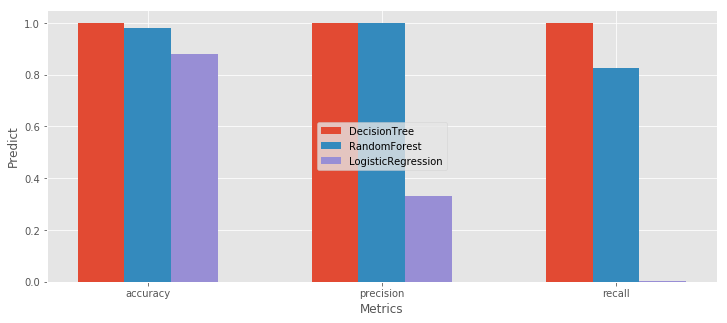

In [268]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

metrics = d['Metric']

# построить столбцы
for dx, model_name in enumerate(d.columns[1:]):
    xs = [i+dx*0.2 for i, _ in enumerate(metrics)]
    plt.bar(xs, d[model_name], 0.2, label = model_name)

plt.xlabel("Metrics")
plt.ylabel("Predict")

# добавить метки на оси X c названиями
plt.xticks([i+0.2 for i, _ in enumerate(metrics)], metrics)
plt.legend(loc=10)
plt.show()



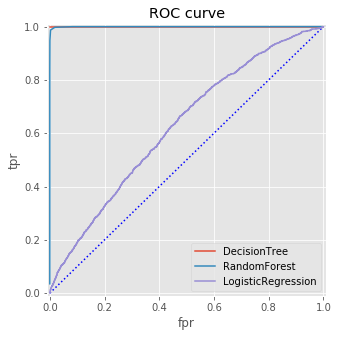

In [269]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], 'b:')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)

plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

fpr, tpr, _ = roc_curve(y_train, predict_proba_DecisionTree[:,1])
plt.plot(fpr, tpr, label = 'DecisionTree')

fpr, tpr, _ = roc_curve(y_train, predict_proba_RandomForest[:,1])
plt.plot(fpr, tpr, label='RandomForest')

fpr, tpr, _ = roc_curve(y_train, predict_proba_LogisticRegression[:,1])
plt.plot(fpr, tpr, label='LogisticRegression')

plt.legend()
plt.show()


In [270]:
print("-"*10," roc_auc_score ","-"*10)
for k, v in predicts.items():
    print(k, roc_auc_score(y_train, v[1][:,1]))

----------  roc_auc_score  ----------
DecisionTree 1.0
RandomForest 0.9996839488416945
LogisticRegression 0.6254215673005719


In [272]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
rfs_set = (DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(),)
for rfs in rfs_set:
    print(rfs.__class__.__name__,'\t:',
    cross_val_score(
        rfc,
        X_train,
        y_train,
        scoring='roc_auc',
        cv=10
    ).mean()
         )


DecisionTreeClassifier 	: 0.5890276435730525
RandomForestClassifier 	: 0.5946855909356243
LogisticRegression 	: 0.6010632253372652


In [273]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
predict = model_LogisticRegression.predict_proba(X_train_test)

roc_auc LogisticRegression:  0.6378575983760431


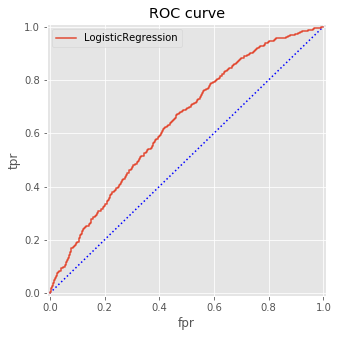

In [274]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

print('roc_auc LogisticRegression: ', roc_auc_score(y_train_test, predict[:,1]))

plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], 'b:')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)

plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

fpr, tpr, _ = roc_curve(y_train_test, predict[:,1])
plt.plot(fpr, tpr, label='LogisticRegression')

plt.legend()
plt.show()


### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)